## Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Loading the data

In [2]:
df_raw = pd.read_csv('marketing_raw_data.csv')

In [3]:
df_raw.head(10)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375000,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750000,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500000,No Promo
5,14/11/2020,46.0,34.0,11.0,11.0,2020.0,Saturday,1316.0,12996.0,1444.000000,Promotion Blue
6,15/11/2020,47.0,35.0,11.0,11.0,2020.0,Sunday,1287.0,11929.0,1325.444444,Promotion Blue
7,16/11/2020,47.0,35.0,11.0,11.0,2020.0,Monday,1548.0,5359.0,1119.111111,No Promo
8,17/11/2020,47.0,35.0,11.0,11.0,2020.0,Tuesday,1448.0,12016.0,1092.363636,Promotion Blue
9,18/11/2020,47.0,35.0,11.0,11.0,2020.0,Wednesday,1362.0,7441.0,906.700000,No Promo


## Data analysis

In [4]:
df_raw.shape

(185, 11)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
Date               185 non-null object
Week               182 non-null float64
Week_ID            182 non-null float64
Month              182 non-null float64
Month_ID           182 non-null float64
Year               182 non-null float64
Day_Name           182 non-null object
Visitors           182 non-null float64
Revenue            182 non-null float64
Marketing Spend    182 non-null float64
Promo              182 non-null object
dtypes: float64(8), object(3)
memory usage: 16.0+ KB


In [6]:
# checking for missing values
df_raw.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [7]:
# dropping missing values because the number of them will not affect the dataset significantly
df_raw = df_raw.dropna()

In [8]:
df_raw.describe()

,Week,Week_ID,Month,Month_ID,Year,Visitors,Revenue,Marketing Spend
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,21.785714,47.351648,5.269231,13.774725,2020.708791,1666.730769,10581.593407,1396.356564
std,18.369841,7.892053,4.204580,1.783540,0.455573,503.528049,6297.626426,691.867416
min,1.000000,34.000000,1.000000,11.000000,2020.000000,488.000000,292.000000,322.000000
25%,8.000000,40.000000,2.000000,12.000000,2020.000000,1339.000000,5929.500000,880.431250
50%,14.000000,48.000000,4.000000,14.000000,2021.000000,1546.000000,9452.000000,1223.900000
75%,47.000000,54.000000,11.000000,15.000000,2021.000000,2027.500000,12959.500000,1676.450000
max,53.000000,61.000000,12.000000,17.000000,2021.000000,4139.000000,36283.000000,4535.375000


## Data visualisation

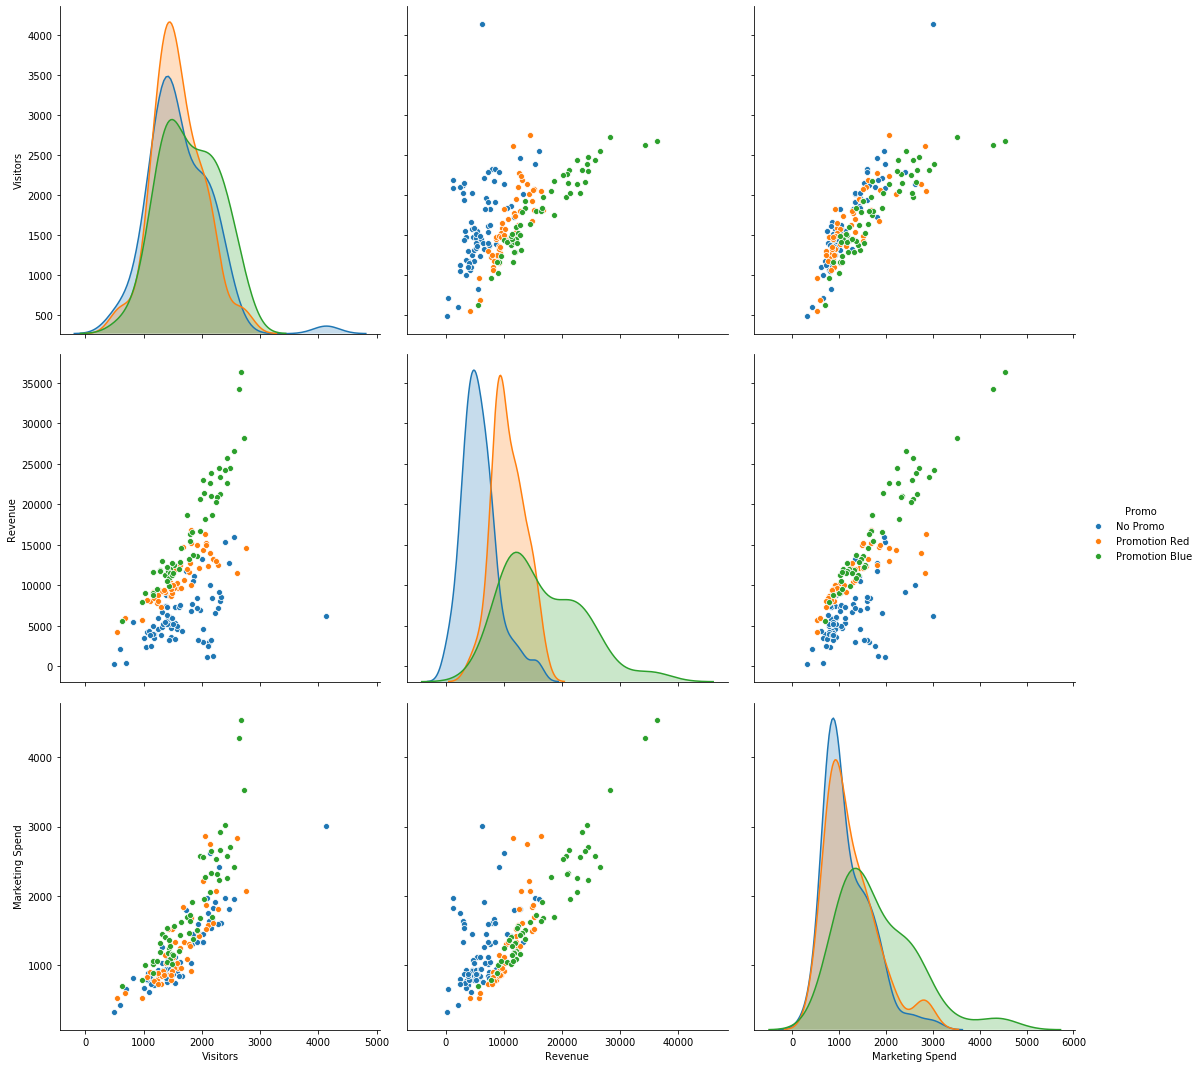

In [9]:
sns.pairplot(df_raw[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo', height = 5)

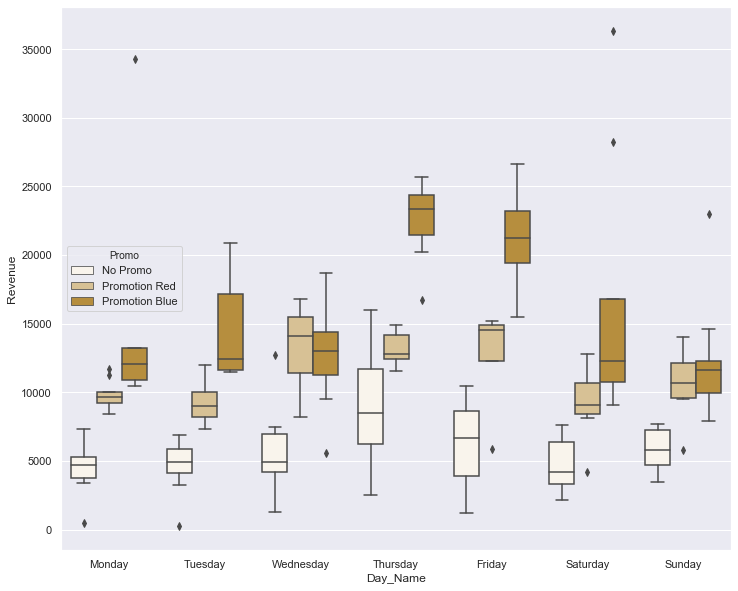

In [10]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x='Day_Name', y='Revenue', data=df_raw, hue='Promo', color='#CA952A')

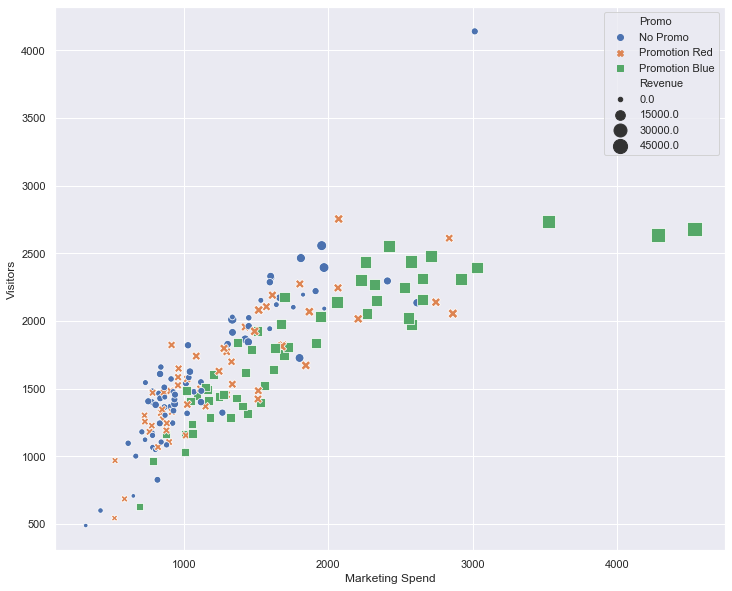

In [11]:
sns.scatterplot(x='Marketing Spend', y='Visitors', data=df_raw, hue='Promo', style='Promo', size='Revenue', sizes=(20,200))

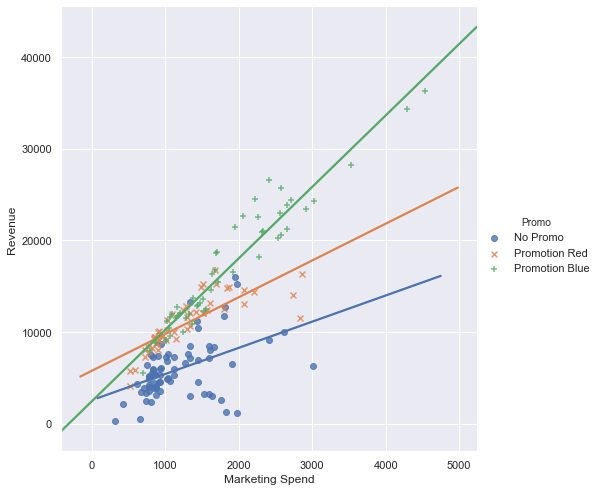

In [12]:
sns.lmplot(x='Marketing Spend', y='Revenue', data=df_raw, height=7, hue='Promo', ci=False, markers=['o', 'x', '+'])

## Data cleaning

In [13]:
df_raw.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [14]:
# selecting relevant columns
df = df_raw[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

In [15]:
df.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [16]:
# changing categorical variables into numberical with dummies
df = pd.get_dummies(df, columns = ['Promo', 'Day_Name'])

In [17]:
df.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


## Feature selection

In [18]:
corr = df[['Visitors','Revenue','Marketing Spend']].corr()

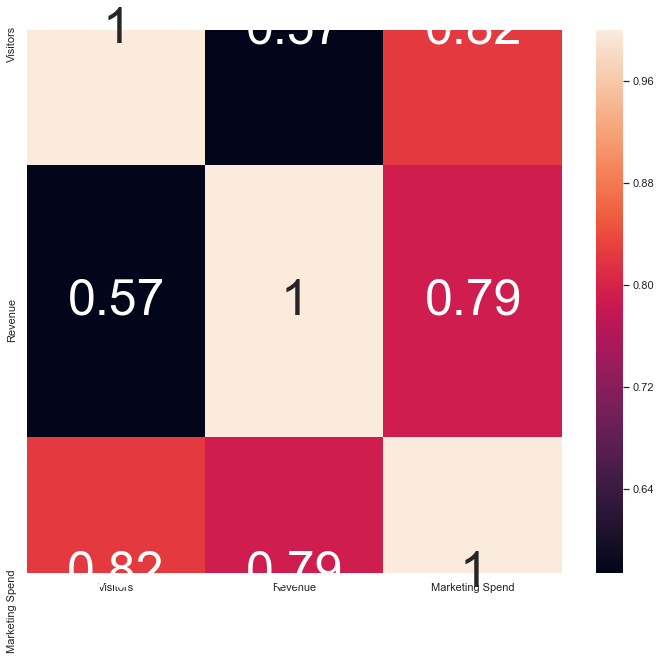

In [19]:
# visualizing correlation with a heatmap
sns.heatmap(corr, annot = True, annot_kws={'size':50})

In [20]:
# split the data into X and y
X = df.drop('Revenue', axis = 1).values
y = df['Revenue']

print(X.shape)
print(y.shape)

(182, 12)
(182,)


In [21]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(145, 12)
(37, 12)
(145,)
(37,)


## Linear regression

In [22]:
reg = LinearRegression(fit_intercept = True)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluating the model

In [28]:
# training data
print('Training data accuracy:', round(reg.score(X_train, y_train),2))

Training data accuracy: 0.84


In [32]:
# test data
print('Testing data accuracy:', round(reg.score(X_test, y_test),2))

Testing data accuracy: 0.7


In [30]:
# intercept
reg.intercept_

3297.1509545220524

In [31]:
# coefficients
reg.coef_

array([-1.21009593e-02,  5.54573940e+00, -3.94674542e+03,  3.35701929e+03,
        5.89726135e+02,  6.49255078e+02,  2.09075344e+02,  1.03603960e+02,
       -4.73525000e+02, -2.09435106e+02, -3.14059527e+01, -2.47568324e+02])